In [4]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

from treemind import Explainer
from treemind.plot import (
    bar_plot,
    range_plot,
    feature_plot,
    interaction_scatter_plot
)

import shap

import seaborn as sns
import matplotlib.pyplot as plt
import shap

from typing import Tuple

from matplotlib.colors import TwoSlopeNorm

In [5]:
# Functions for plotting real data:
# - _set_common_style: Applies a consistent visual style to all plots to match the style used by TreeMind.
# - plot_line_chart: Creates a line chart to visualize trends in data over a continuous range.
# - plot_scatter_chart: Generates a scatter plot to explore relationships between two variables, with a third variable indicated by color.


def _set_common_style(ax, title):
    ax.set_facecolor("whitesmoke")
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)


def plot_line_chart(x, y, title, x_label, y_label, figsize: Tuple[int, int] = (10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(x=x, y=y, ax=ax, color="blue", linewidth=2)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    _set_common_style(ax, title)
    plt.tight_layout()
    plt.show()


def plot_scatter_chart(
    x, y, z, title, x_label, y_label, cbar_label, figsize: Tuple[int, int] = (10, 6)
):
    fig, ax = plt.subplots(figsize=figsize)

    max_val = z.max()
    min_val = z.min()

    if max_val < 0:  # All values are negative
        colormap = plt.get_cmap("Blues")
        norm = plt.Normalize(vmin=min_val, vmax=max_val)
    elif min_val > 0:  # All values are positive
        colormap = plt.get_cmap("Reds")
        norm = plt.Normalize(vmin=min_val, vmax=max_val)
    else:  # Both negative and positive values
        colormap = plt.get_cmap("coolwarm")
        abs_max = max(abs(min_val), max_val)
        norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)

    scatter = ax.scatter(x, y, c=z, cmap=colormap, norm=norm, edgecolor="k")

    cbar = plt.colorbar(scatter, ax=ax)

    cbar.ax.set_yscale("linear")
    cbar.ax.set_ylim(min_val, max_val)
    cbar.set_label(cbar_label)

    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    _set_common_style(ax, title)

    plt.tight_layout()
    plt.show()

In [6]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

model = LGBMClassifier(verbose=-1, is_unbalance=True)
model.fit(X, y)

LGBMClassifier(is_unbalance=True, verbose=-1)

In [7]:
explainer = Explainer()
explainer(model)

shap_exp = shap.TreeExplainer(model)
shap_val = shap_exp(X)
shap_interaction_values = shap_exp.shap_interaction_values(X)

In [40]:
explainer.count_node(interaction = False).head()

,column_index,count
0,21,1587
1,27,1448
2,23,1367
3,22,1358
4,1,1071


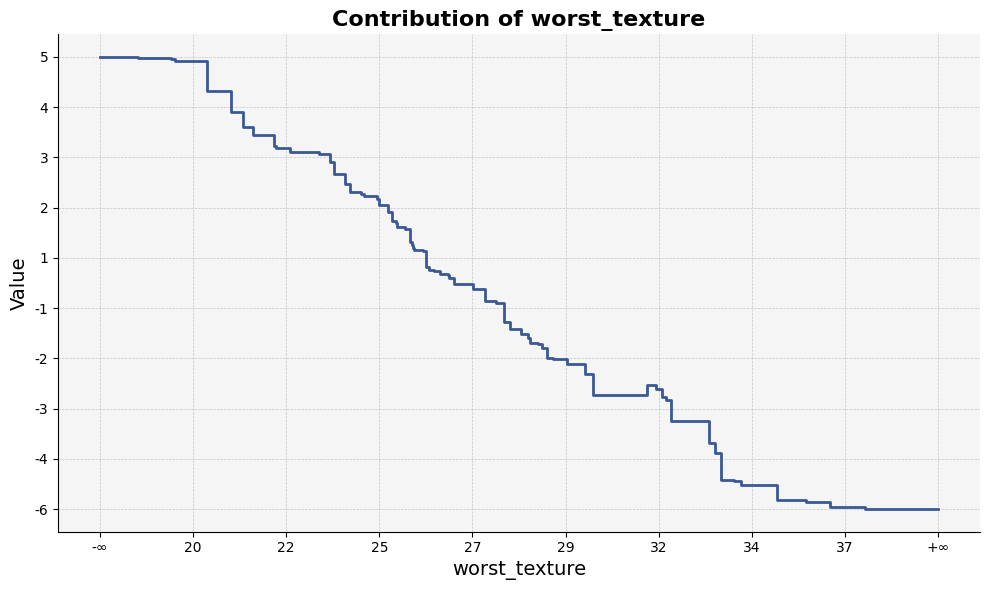

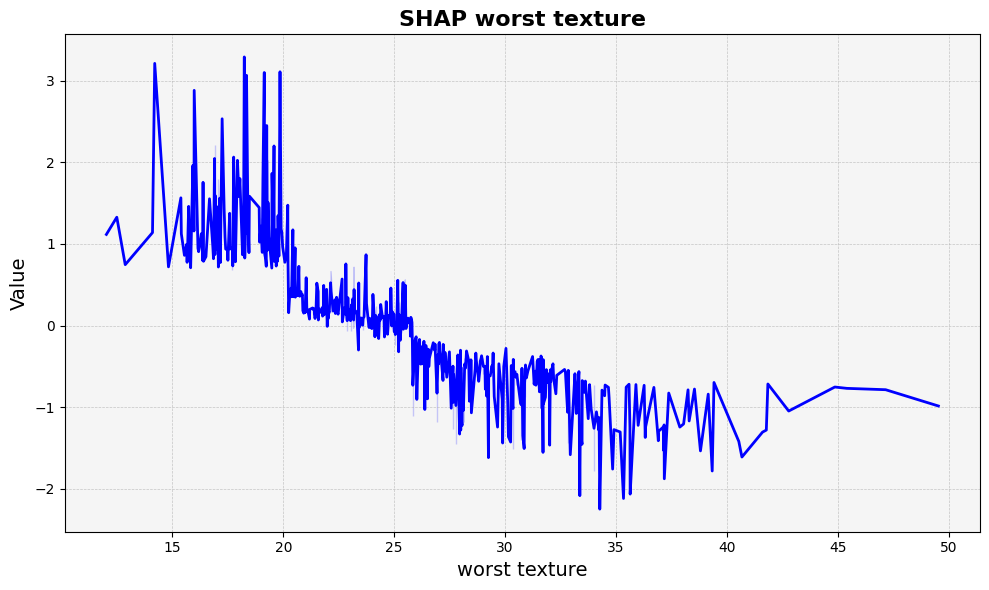

In [75]:
f = 21

feature_df = explainer.analyze_feature(f)

feature_plot(feature_df, show_range=False, figsize=(10,6))

plot_line_chart(
    x=X.iloc[:,f],
    y=shap_val.values[:, f],
    x_label=X.columns[f],
    y_label="Value",
    title=f"SHAP {X.columns[f]}",
)

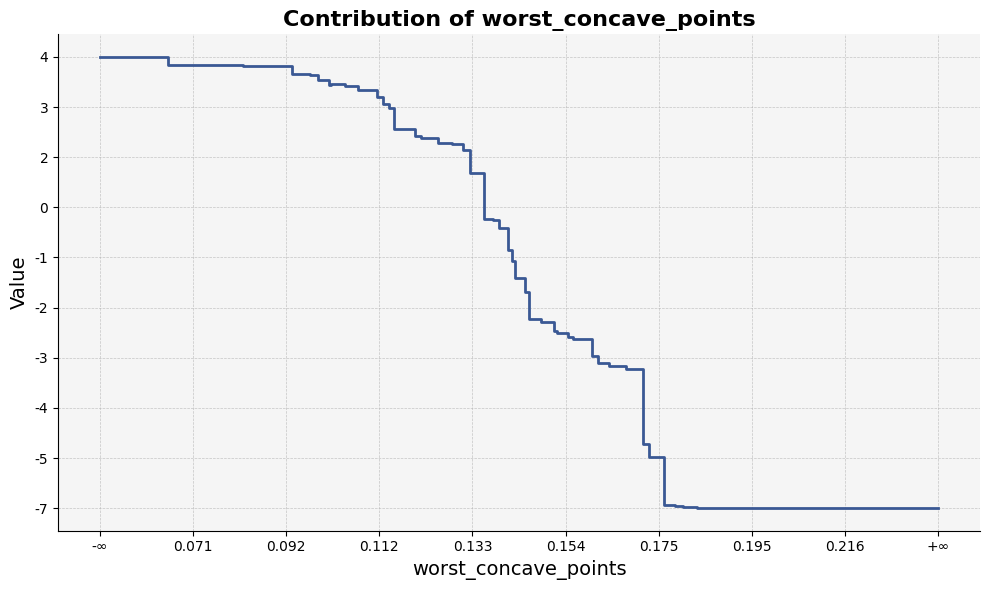

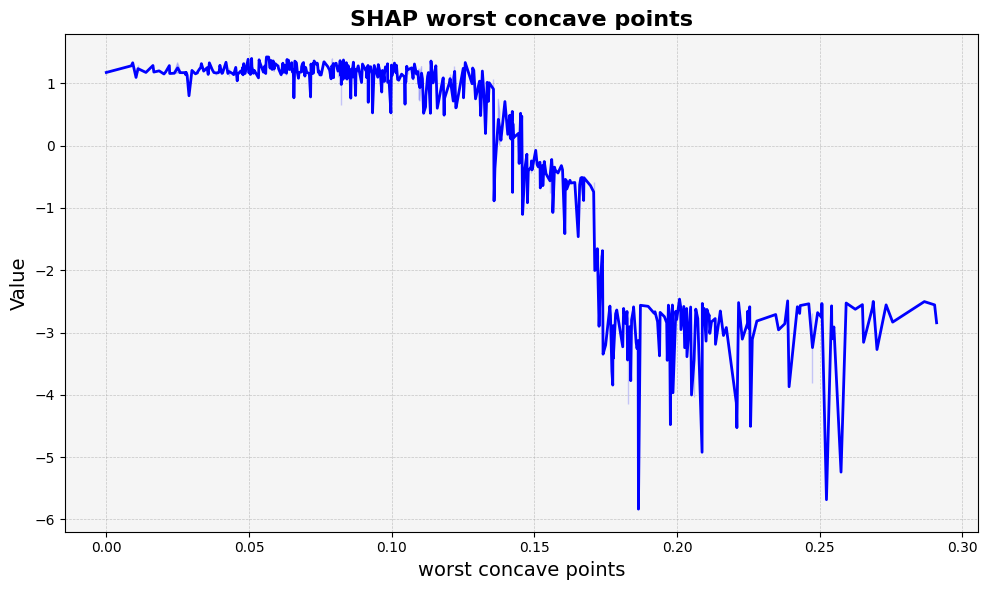

In [76]:
f = 27

feature_df = explainer.analyze_feature(f)

feature_plot(feature_df, show_range=False, figsize=(10,6))

plot_line_chart(
    x=X.iloc[:,f],
    y=shap_val.values[:, f],
    x_label=X.columns[f],
    y_label="Value",
    title=f"SHAP {X.columns[f]}",
)

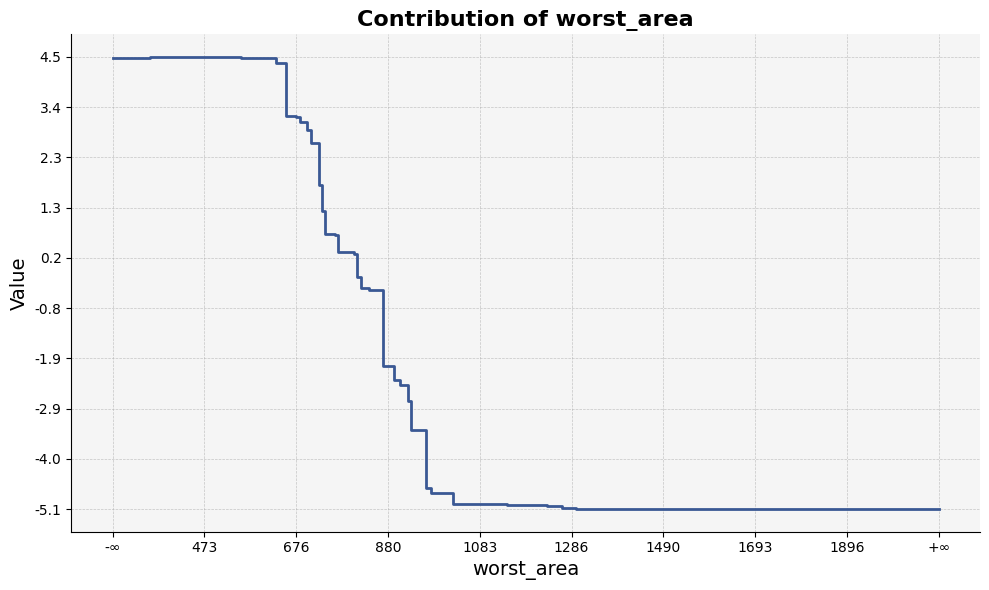

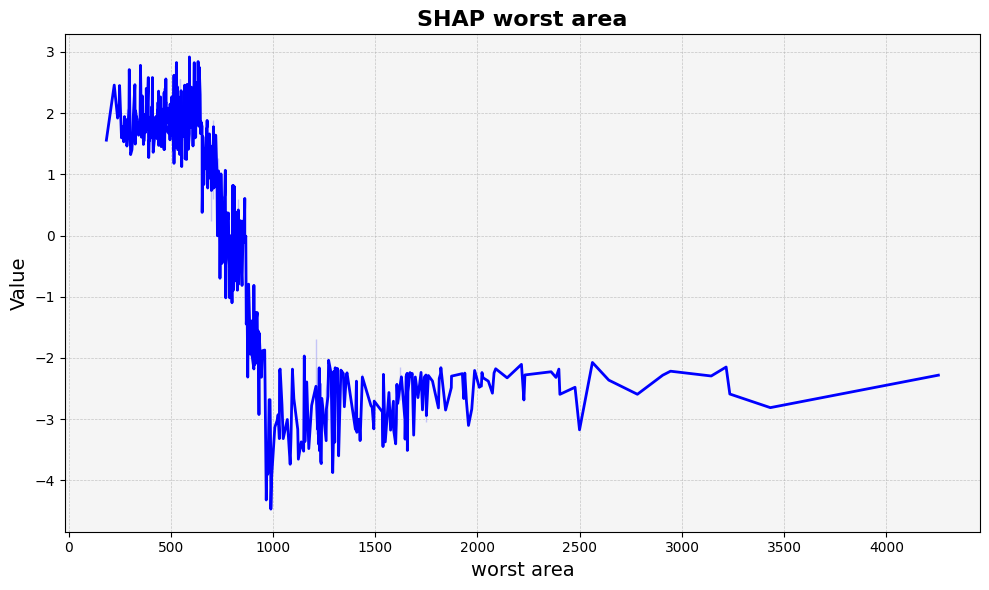

In [77]:
f = 23

feature_df = explainer.analyze_feature(f)

feature_plot(feature_df, show_range=False, figsize=(10,6))

plot_line_chart(
    x=X.iloc[:,f],
    y=shap_val.values[:, f],
    x_label=X.columns[f],
    y_label="Value",
    title=f"SHAP {X.columns[f]}",
)

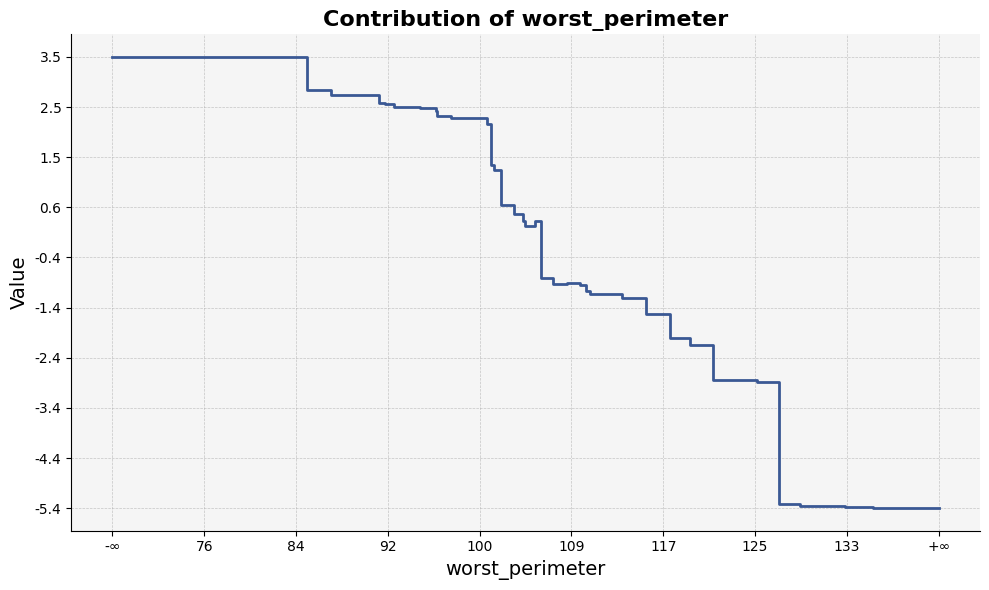

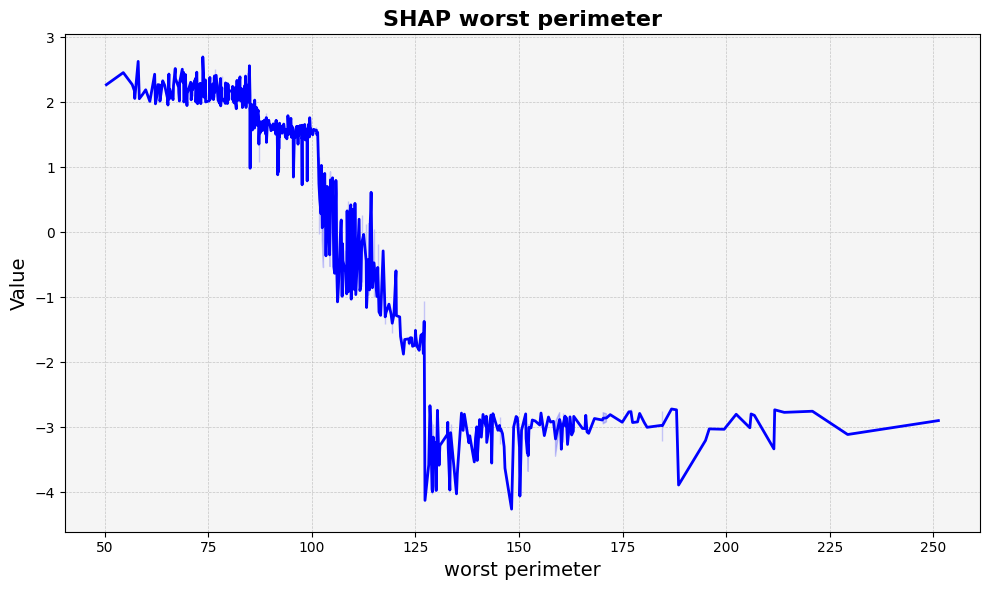

In [78]:
f = 22

feature_df = explainer.analyze_feature(f)

feature_plot(feature_df, show_range=False, figsize=(10,6))

plot_line_chart(
    x=X.iloc[:,f],
    y=shap_val.values[:, f],
    x_label=X.columns[f],
    y_label="Value",
    title=f"SHAP {X.columns[f]}",
)

In [64]:
explainer.count_node(interaction=True)

,column1_index,column2_index,count
0,21,22,830
1,21,23,808
2,23,27,759
3,21,27,741
4,1,27,707
...,...,...,...
429,3,28,6
430,10,16,5
431,0,16,5
432,0,17,4


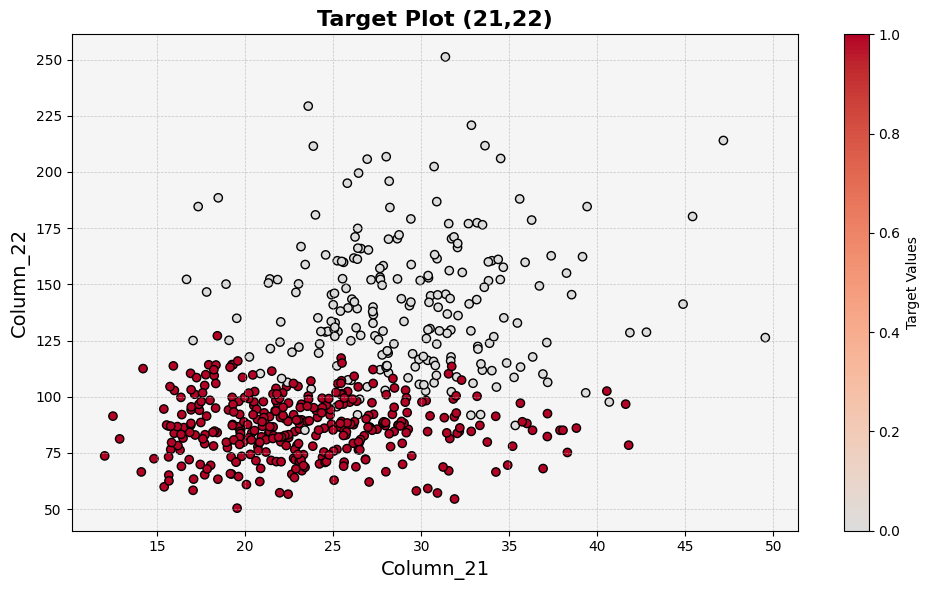

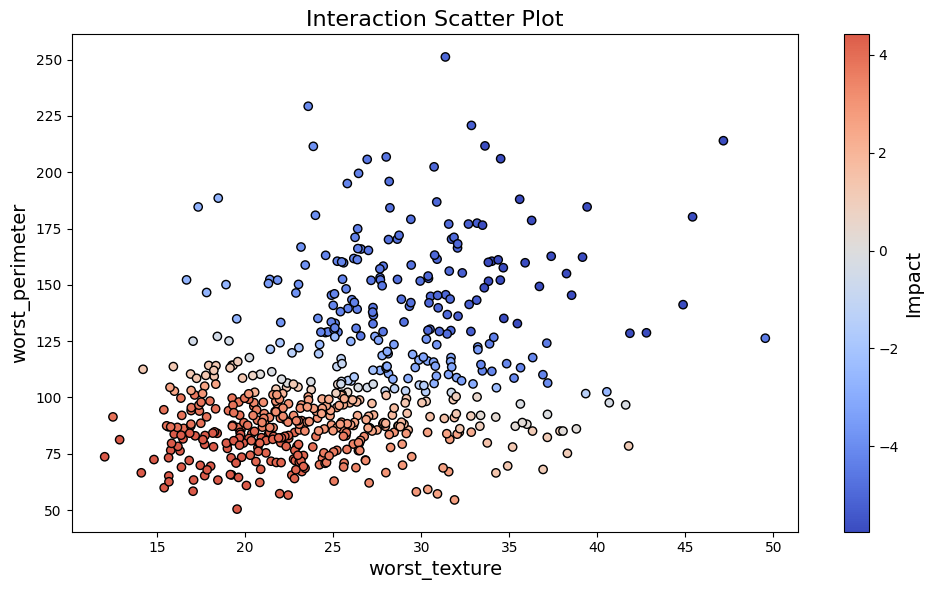

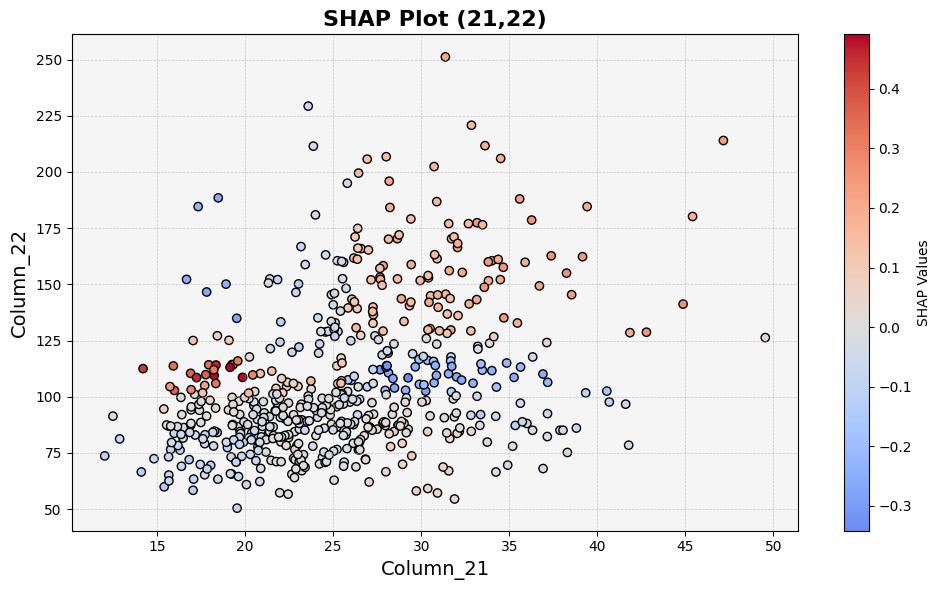

In [72]:
# Interaction Analysis: Feature 2 & Feature 3
f1= 21
f2= 22
df = explainer.analyze_interaction(f1, f2)

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    y,
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"Target Plot ({f1},{f2})",
    cbar_label="Target Values",
)

interaction_scatter_plot(X, df, f1, f2,  figsize = (10,6))

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    shap_interaction_values[:, f1, f2],
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"SHAP Plot ({f1},{f2})",
    cbar_label="SHAP Values",
)

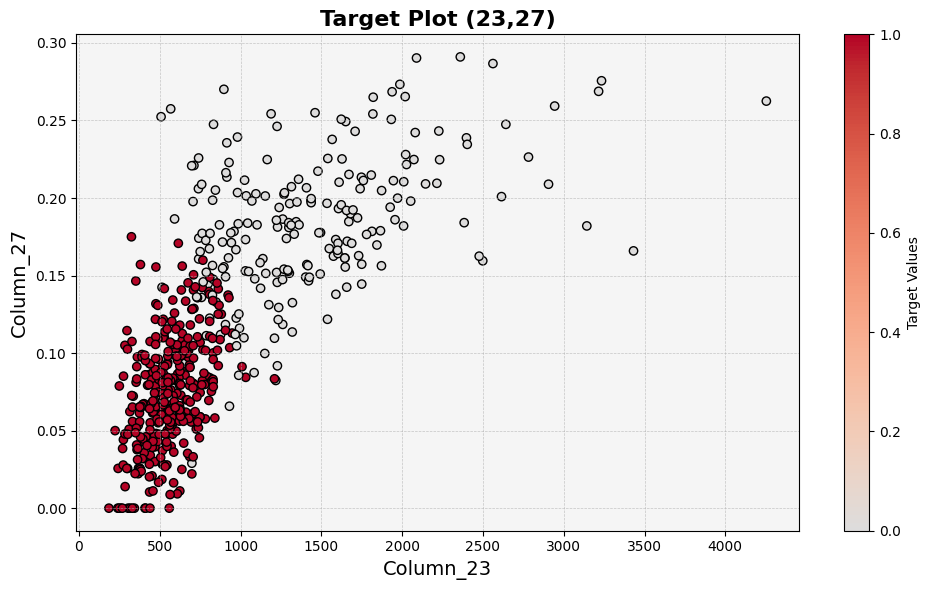

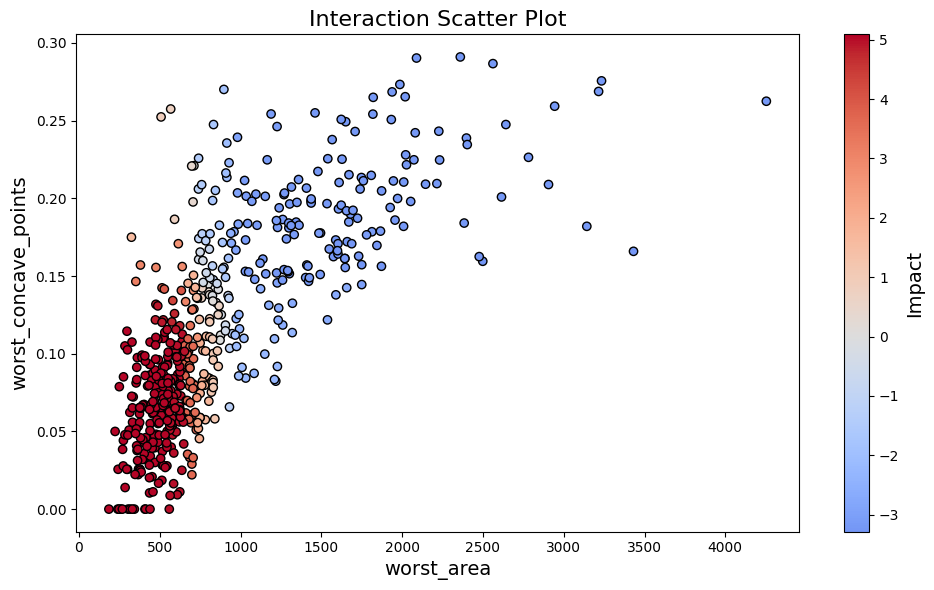

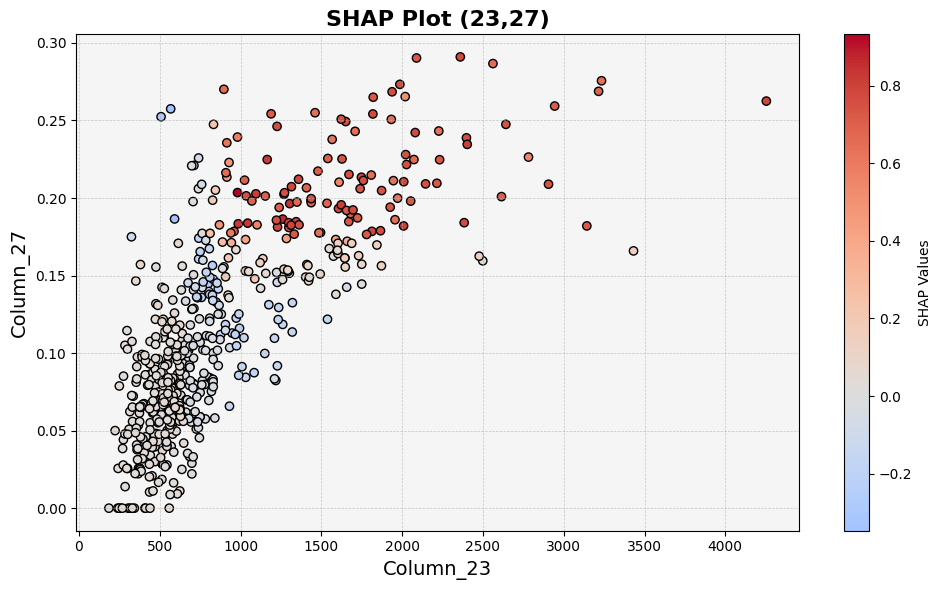

In [70]:
# Interaction Analysis: Feature 2 & Feature 3
f1= 23
f2= 27
df = explainer.analyze_interaction(f1, f2)

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    y,
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"Target Plot ({f1},{f2})",
    cbar_label="Target Values",
)

interaction_scatter_plot(X, df, f1, f2,  figsize = (10,6))

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    shap_interaction_values[:, f1, f2],
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"SHAP Plot ({f1},{f2})",
    cbar_label="SHAP Values",
)

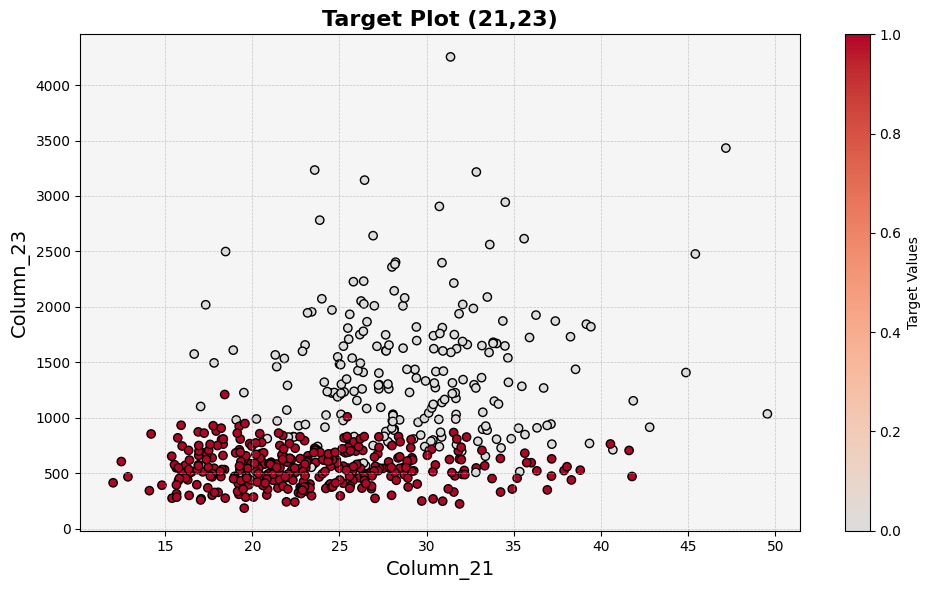

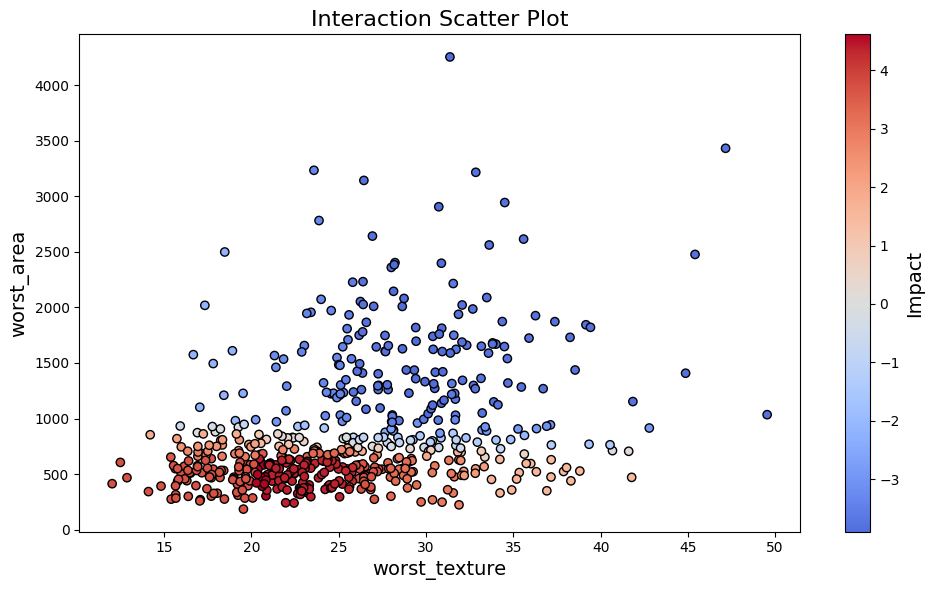

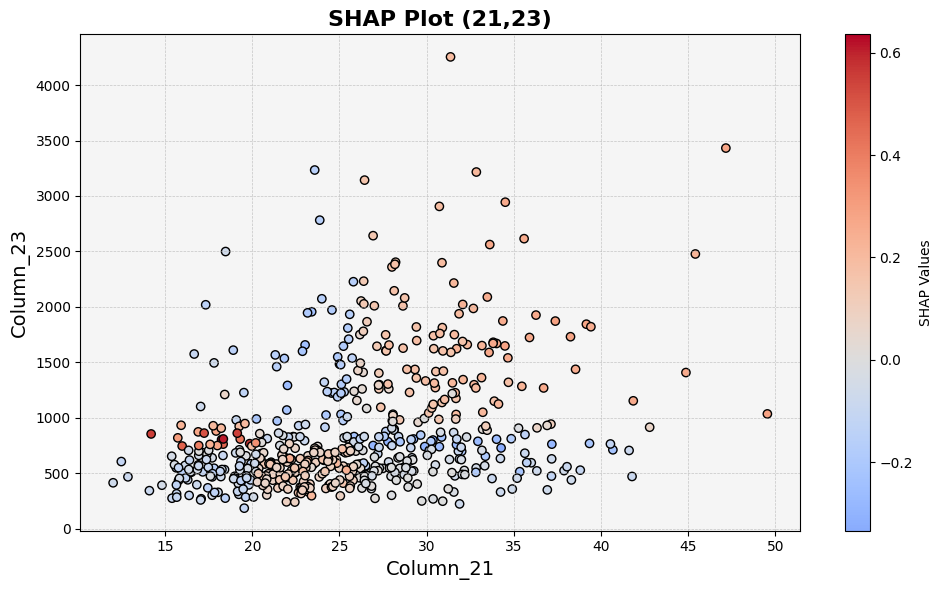

In [73]:
# Interaction Analysis: Feature 2 & Feature 3
f1= 21
f2= 23
df = explainer.analyze_interaction(f1, f2)

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    y,
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"Target Plot ({f1},{f2})",
    cbar_label="Target Values",
)

interaction_scatter_plot(X, df, f1, f2,  figsize = (10,6))

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    shap_interaction_values[:, f1, f2],
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"SHAP Plot ({f1},{f2})",
    cbar_label="SHAP Values",
)

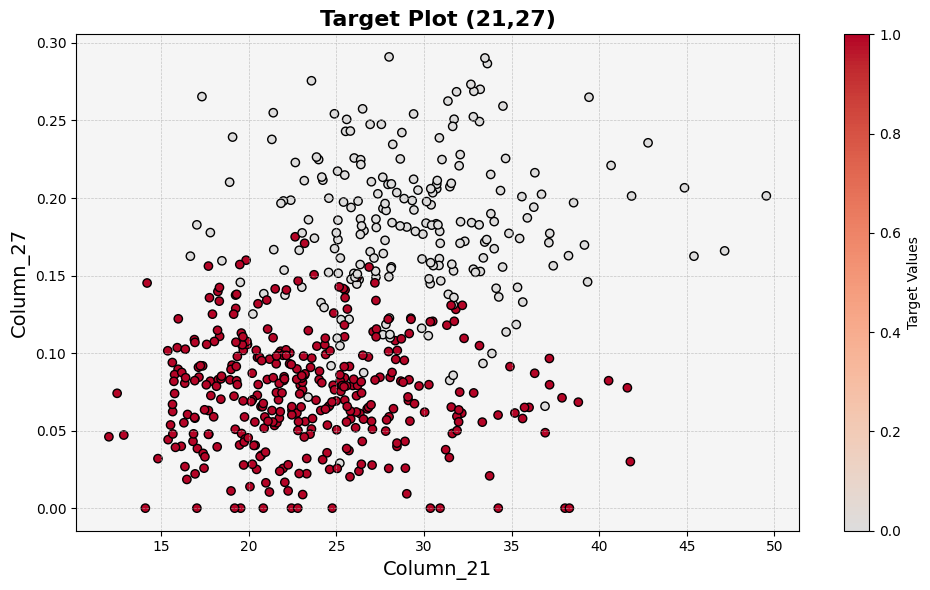

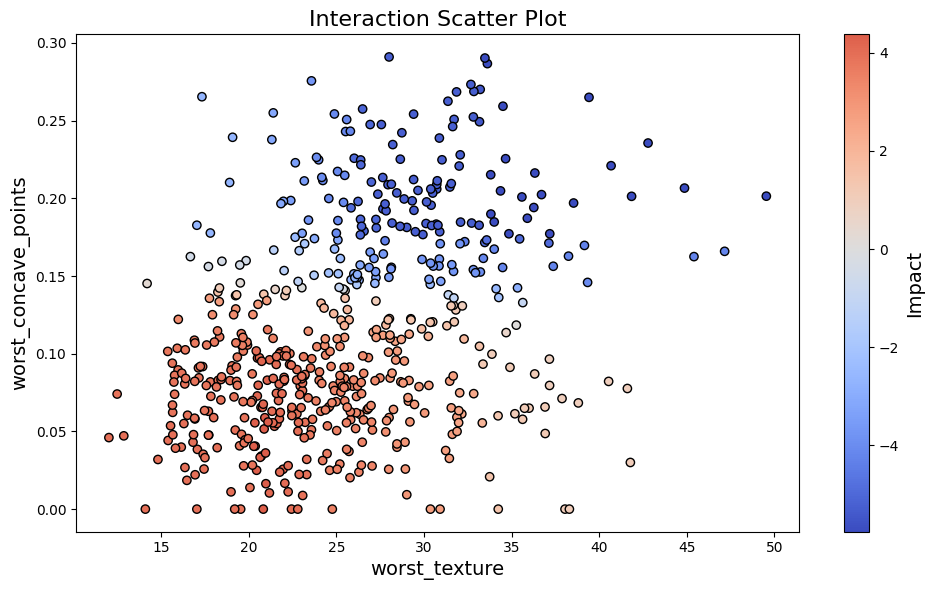

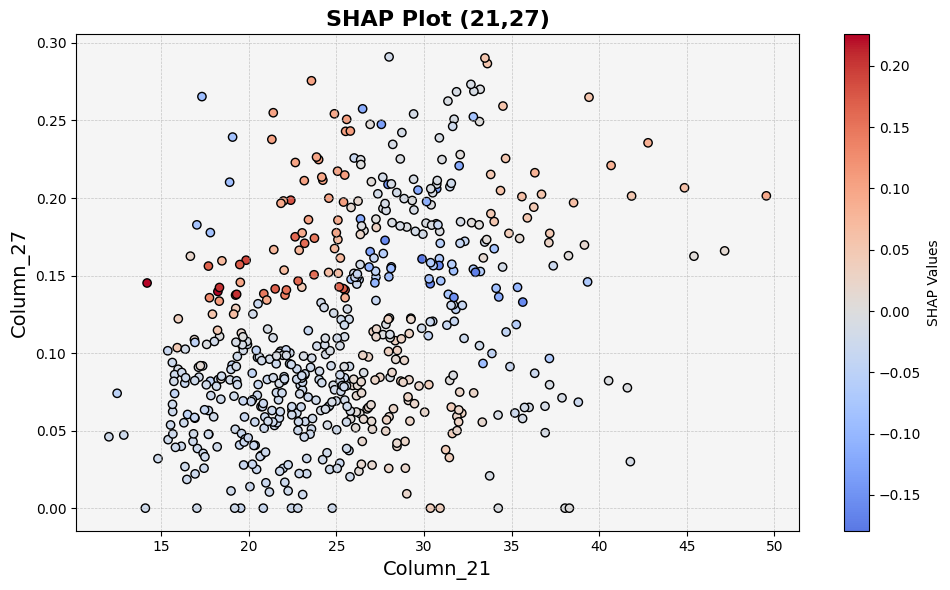

In [74]:
# Interaction Analysis: Feature 2 & Feature 3
f1= 21
f2= 27
df = explainer.analyze_interaction(f1, f2)

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    y,
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"Target Plot ({f1},{f2})",
    cbar_label="Target Values",
)

interaction_scatter_plot(X, df, f1, f2,  figsize = (10,6))

plot_scatter_chart(
    X.iloc[:,f1],
    X.iloc[:,f2],
    shap_interaction_values[:, f1, f2],
    x_label=f"Column_{f1}",
    y_label=f"Column_{f2}",
    title=f"SHAP Plot ({f1},{f2})",
    cbar_label="SHAP Values",
)